### DS4440: Homework 1

This homework covers gradient descent, and logistic regression for (binary) classification, and PyTorch.

You are allowed to upload a *single* notebook file (modifying this starter notebook) to Piazza that contains answers to all problems, including the written ones (for which you much use [LaTeX](https://www.overleaf.com/learn/latex/Free_online_introduction_to_LaTeX_(part_1))).



Your name: Xin Huang

## Q1: Deriving the Gradient (*35 points*)

Assume we want to perform binary classification, i.e., $y_i \in \{0,1\}$.
In logistic regression, we posit the following model (parameterized by ${\bf w}$): 

> $p(y_i=1|{\bf x}_i, {\bf w}) = \sigma({\bf w} \cdot {\bf x}_i)$

Where $\sigma$ is the sigmoid function: $\sigma(z) = \frac{1}{1 + e^{-z}}$. 



The log-likelihood for this model is:

> $LL({\bf w}| {\bf x}, {\bf y}) = \sum_i y_i {\text {ln}}\{p(y_i|{\bf x}_i, {\bf w})\} + (1 - y_i) {\text{ln}}\{1 - p(y_i|{\bf x}_i, {\bf w})\}$



Formulate this as a **minimization** problem for gradient descent, and derive the gradient with respect to the parameters ${\bf w}$. **Show your steps**.





### Q1 Answer

*Solution here*

We would like to maximize our log-likelihood model and to formalize it into a minimization problem, thus we want to take the gradient for this formula

> $\nabla_w LL({\bf w}| {\bf x}, {\bf y}) 
= \nabla_w （ y {\text {ln}}\{p(y|{\bf x}, {\bf w})\} - (1 - y) {\text{ln}}\{1 - p(y|{\bf x}, {\bf w})\}）
= （\nabla_w y {\text {ln}}\{p(y|{\bf x}, {\bf w})\} - \nabla_w(1 - y) {\text{ln}}\{1 - p(y|{\bf x}, {\bf w})\} ）
= (\frac{y}{p(y|x,w)} - \frac{1-y}{{(1-p(y|x,w))}})\cdot \nabla_w p(y|x,w)$

> For Sigmoid function $ \frac{\partial}{\partial z} \sigma (z) = \sigma(z)[1-\sigma(z)] $

> Since $p(y_i = 1|x_i,w) = \sigma({\bf w} \cdot {\bf x}_i)$, so $\nabla_w LL({\bf w}| {\bf x}, {\bf y})
= (\frac{y}{\sigma(w\cdot x)} - \frac{1-y}{1-\sigma(w\cdot x)}) \cdot \sigma(w\cdot x) \cdot (1-\sigma(w\cdot x)) \cdot x^T 
= \frac{y-y\sigma(w\cdot x) - \sigma(w \cdot x) + y\sigma(w\cdot x)}{\sigma(w\cdot x) \cdot (1-\sigma(w\cdot x))} \cdot \sigma(w\cdot x) \cdot (1-\sigma(w\cdot x)) \cdot x^T
= [y - \sigma(w \cdot x)] \cdot x^T $

> Thus, to have good-fit model, gradient log-likelihood $\nabla_w LL({\bf w}| {\bf x}_i, {\bf y}_i) = \sum_i[y_i - \sigma(w \cdot x_i)] \cdot x_i^T$, so the loss function would be $\nabla_w LL({\bf w}| {\bf x}, {\bf y})
= - \sum_i[y_i - \sigma(w \cdot x_i)] \cdot x_i^T $ and we can update our $w$ as following:

> $w_{new} = w_{old} + \lambda (\sum_i[y_i - \sigma(w \cdot x_i)] \cdot x_i^T)$, $\lambda$ is the learning rate


# Logistic Regression: 3-ways!

In this section you will implement logistic regression in two different ways.
For each, fit to the simple Iris data; you can get the `X`, `y` values via the provided helper function.
Do not include bias (`intercept') terms. 

For each version of LR below, divvy your data into a validation set (we'll say 10% of the iris X, y), and a training set (the rest)
Compute a validation loss each epoch, and retain these
Make plots of your validation losses (a helper function is provided).
Print your model weights.
Don't forget to rerun everything when you have finished!

#### Shared imports and helper functions

In [ ]:
# imports
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import sklearn
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, log_loss

def get_iris_X_y(shuffle_instances=True):
  '''
  The Iris dataset is a famous dataset comprising flower characteristics.
  We'll recast as a binary classification task.
  '''
  iris_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
                   header=None)
  y = iris_df.iloc[0:100, 4].values 
  y = np.where(y == 'Iris-setosa', -1, 1)
  y[y<0] = 0 # convert to 1/0 labels
  X = iris_df.iloc[0:100, [0, 2]].values
  if shuffle_instances:
    X, y = shuffle(X, y, random_state=0)
  return X, y


def sigmoid(x):
  ''' a useful helper function. '''
  return 1/(1+np.exp(-x))




y### Q2. Pure `numpy` implementation (*35 points*)

[-6.53268475 13.21558807]


Text(0, 0.5, 'errors')

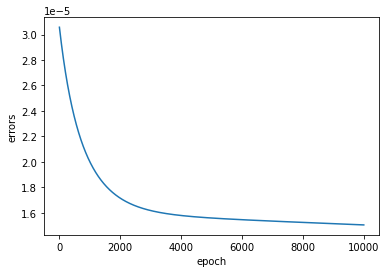

In [ ]:
def LR_SGD(X, y, epochs, alpha=0.1):
  '''
  Parameters
  ---
  X: (n x d) matrix comprising n instances with d dimensions/features.
  y: (n x 1) vector comprising labels (0/1)
  epochs: number of epochs to run
  alpha: the learning rate
  '''

  ###
  
  w = np.random.rand(X.shape[1])
  
  for epoch in range(epochs):
    for i in range(X.shape[0]):
      net_input = np.dot(X[i,:],w)
      grad = np.dot((y[i] - sigmoid(net_input)),X[i,:]) ##Calculate the gradient
      w = w + (alpha * grad) ##Update w by learning rate and gradient
  return w

X,y = get_iris_X_y()
y_train = y[0:90]
X_train = X[0:90,:]
w = LR_SGD(X_train,y_train,10000)
y_hat1 = sigmoid(np.dot(X,w))
print(w)

##Plot loss for validation set
def Losses_SGD(X,y,w,epchos):
  
  losses = [] #record losses
  alpha = 0.1
  for e in range(epchos):
    y_hat = sigmoid(np.dot(X,w))
    epoch_loss = log_loss(y,y_hat)
    losses.append(epoch_loss)
    for i in range(X.shape[0]):
      net_input = np.dot(X[i,:],w)
      grad = np.dot((y[i] - sigmoid(net_input)),X[i,:]) ##Calculate the gradient
      w = w + (alpha * grad)
  return losses

y_val = y[90:100]
X_val = X[90:100,:]
v_losses1 = Losses_SGD(X_val,y_val,w,10000)
plt.plot(v_losses1)
plt.xlabel("epoch")
plt.ylabel("errors")





### Q3 `pytorch` implementation -- **no NN module** (*20 points*)

In [ ]:
!pip3 install torch

import torch
from torch.autograd import Variable

tensor([[-3.0364],
        [-0.5695]], requires_grad=True)


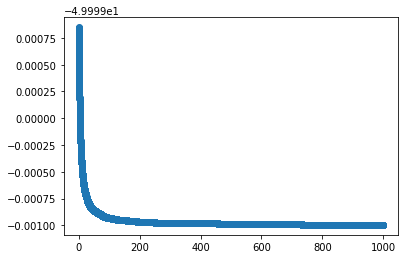

In [ ]:
import tensorflow as tf
def MSE(y_hat,y):
  return torch.pow(y_hat - y, 2).sum()

def LR_torch_no_nn(X, y):
  ####
  y_train = y[0:90]
  X_train = X[0:90,:]
  y_val = y[90:100]
  X_val = X[90:100,:]

  x_train_t = Variable(torch.from_numpy(X_train)).float()
  y_train_t = Variable(torch.from_numpy(y_train)).float()
  x_val_t = Variable(torch.from_numpy(X_val)).float()
  y_val_t = Variable(torch.from_numpy(y_val)).float()

  w = torch.randn(2,1,dtype = torch.float,requires_grad = True)
  epochs = 100000
  learning_rate = 0.0005
  val_losses = np.array([])
  for e in range(epochs):
    y_hat = torch.sigmoid(torch.mm(x_train_t,w))
    loss = -1 * MSE(y_hat,y_train_t)
    loss.backward()
    with torch.no_grad():
        w -= learning_rate * w.grad
        # Manually zero the gradients after updating weights
        w.grad.zero_()

    y_hat_val = torch.sigmoid(torch.mm(x_val_t,w))
    val_loss = -1 * MSE(y_hat_val,y_val_t)
    val_loss.backward
    val_loss_np = val_loss.detach().numpy()
    val_losses = np.append(val_losses, [val_loss_np])

    with torch.no_grad():
        w -= learning_rate * w.grad
        # Manually zero the gradients after updating weights
        w.grad.zero_()
  return w, val_losses

w, val_losses = LR_torch_no_nn(X, y)
x_plot = np.linspace(0, 1000, num=100000, endpoint=False)
plt.scatter(x_plot, val_losses)
print(w)

  

### Q4 `pytorch` implementation -- **with the NN module** (*10 points*)

In [ ]:
import torch.nn as nn

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([90])) that is different to the input size (torch.Size([90, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


[Parameter containing:
tensor([[-3.3278,  6.6559]], requires_grad=True)]


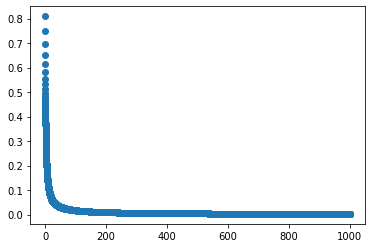

In [ ]:
class LogReg(nn.Module):

  def __init__(self,d):
    super(LogReg,self).__init__()
    self.linear = nn.Linear(d,1,bias=False)
  
  def forward(self,x):
    z = self.linear(x)
    return torch.sigmoid(z)

def LR_torch(X, y):
  ####
  y_train = y[0:90]
  X_train = X[0:90,:]
  y_val = y[90:100]
  X_val = X[90:100,:]

  d = len(X_train[0])
  L = nn.BCELoss()
  m = LogReg(d = len(X_train[0]))
  optimizer = torch.optim.SGD(m.parameters(),lr = 0.01)

  x_train_t = torch.from_numpy(X_train).float()
  y_train_t = torch.from_numpy(y_train).float()
  x_val_t = torch.from_numpy(X_val).float()
  y_val_t = torch.from_numpy(y_val).float()

  epochs = 100000
  val_losses = np.array([])
  for e in range(epochs):
    optimizer.zero_grad()
    predictions = m(x_train_t)
    loss = L(predictions,y_train_t)
    loss.backward()
    optimizer.step()
    
    val_loss_np = L(m(x_val_t), y_val_t).detach().numpy()
    val_losses = np.append(val_losses, [val_loss_np])

    
  return val_losses, m

losses, model = LR_torch(X,y)
x_plot = np.linspace(0, 1000, num=100000, endpoint=False)
plt.scatter(x_plot, losses)
print(list(model.parameters()))